In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


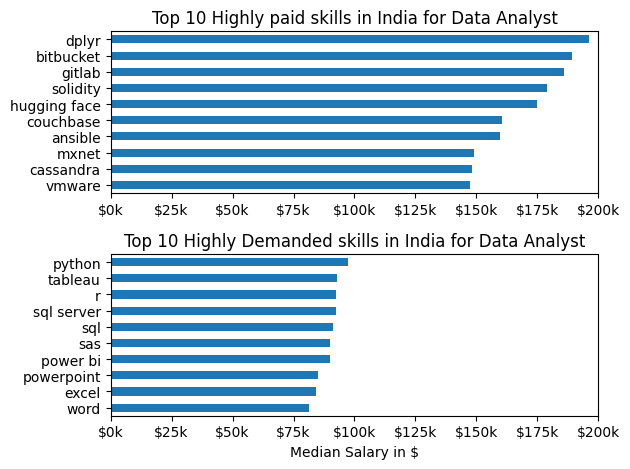

In [3]:
df_IN_DA = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] =='United States')].copy()
df_IN_DA = df_IN_DA.dropna(subset='salary_year_avg')
df_IN_DA[['job_title_short','job_country','salary_year_avg']]
df_IN_DA = df_IN_DA.explode('job_skills')
df_high_paid =df_IN_DA.groupby('job_skills').agg(
    median = ('salary_year_avg','median')
).sort_values(by='median',ascending=False).head(10)
df_high_demand = df_IN_DA.groupby('job_skills')['salary_year_avg'].count().sort_values(ascending=False).head(10)
df_high_demand = df_IN_DA.groupby('job_skills').agg(
    count = ('job_skills','size'),
    salary_median = ('salary_year_avg','median')
    ).sort_values(by='count',ascending=False).head(10)
df_high_demand = df_high_demand.sort_values(by='salary_median',ascending=False)


fig , ax = plt.subplots(2,1)

df_high_paid.plot(kind='barh',ax = ax[0],legend=False, ylabel='',title='Top 10 Highly paid skills in India for Data Analyst', xlim=(0,200_000))
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))


df_high_demand.plot(kind='barh', y='salary_median',ax = ax[1],legend=False, xlabel='Median Salary in $',ylabel='',title='Top 10 Highly Demanded skills in India for Data Analyst', xlim=(0,200_000))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[1].invert_yaxis()

fig.tight_layout()


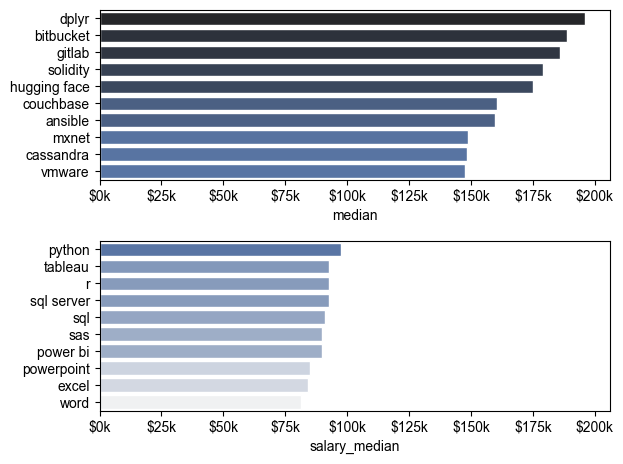

In [4]:
fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_high_paid, x='median',y=df_high_paid.index , ax=ax[0],hue='median', palette='dark:b_r',legend=False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[0].set_ylabel('')

sns.barplot(data=df_high_demand, x='salary_median',y=df_high_demand.index , ax=ax[1],hue='salary_median', palette='light:b',legend=False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
fig.tight_layout()

Text(0, 0.5, 'Job Posting')

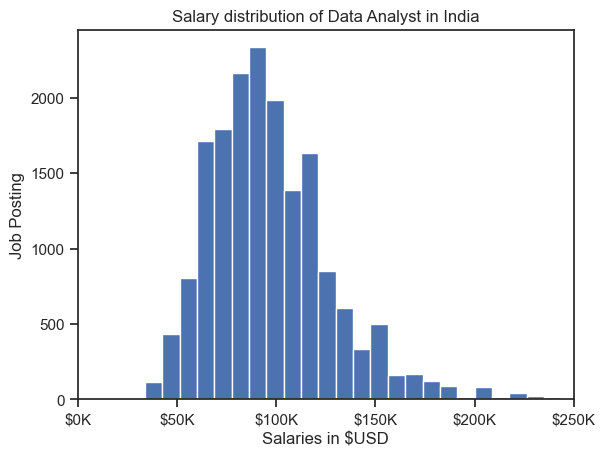

In [16]:
df_IN_DA['salary_year_avg'].plot(kind='hist',bins=40,xlim=(0,250_000))
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos : f'${int(x/1000)}K'))
plt.title("Salary distribution of Data Analyst in India")
plt.xlabel("Salaries in $USD")
plt.ylabel("Job Posting")

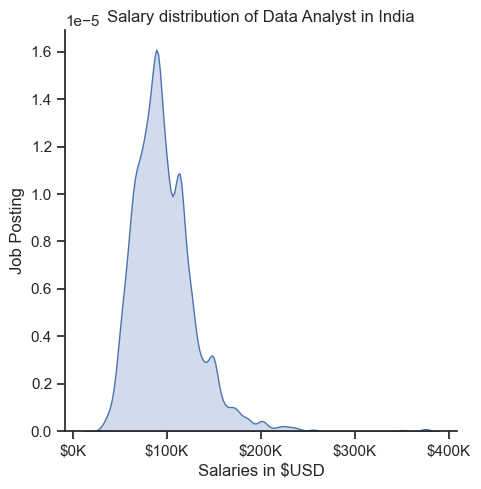

In [21]:
# sns.displot(df_IN_DA['salary_year_avg'])
sns.displot(df_IN_DA['salary_year_avg'],kind="kde",fill=True)
# .plot(kind='hist',bins=40,xlim=(0,250_000))
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos : f'${int(x/1000)}K'))
plt.title("Salary distribution of Data Analyst in India")
plt.xlabel("Salaries in $USD")
plt.ylabel("Job Posting")
plt.show()


C:\Users\Ankit\AppData\Local\Temp\ipykernel_10228\4179359945.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=data_jobs,vert=False)


Text(0.5, 0, 'Yearly Salaries')

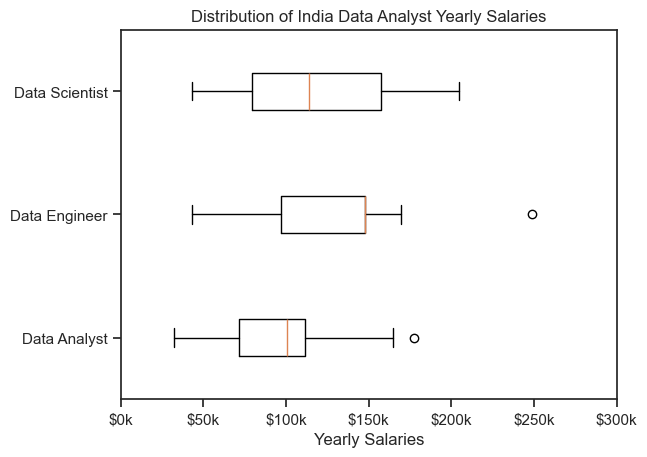

In [38]:
data_jobs = df.value_counts(subset='job_title_short').sort_values(ascending=False).head(3).index.to_list()
# data_jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst']
df_IN = df[(df['job_title_short'].isin(data_jobs)) & (df['job_country'] =='India')].copy()
df_IN = df_IN.dropna(subset='salary_year_avg') 
df_IN['job_title_short'].unique()

job_list = [df_IN[(df_IN['job_title_short'] == data_job)]['salary_year_avg'] for data_job in data_jobs]
# job_list[1].notna().unique()
# print(job_list[1])

plt.boxplot(job_list,labels=data_jobs,vert=False)
# sns.boxplot(data='',x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))
plt.xlim(0,300_000)
plt.title('Distribution of India Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')


Text(0.5, 0, 'Yearly Salaries')

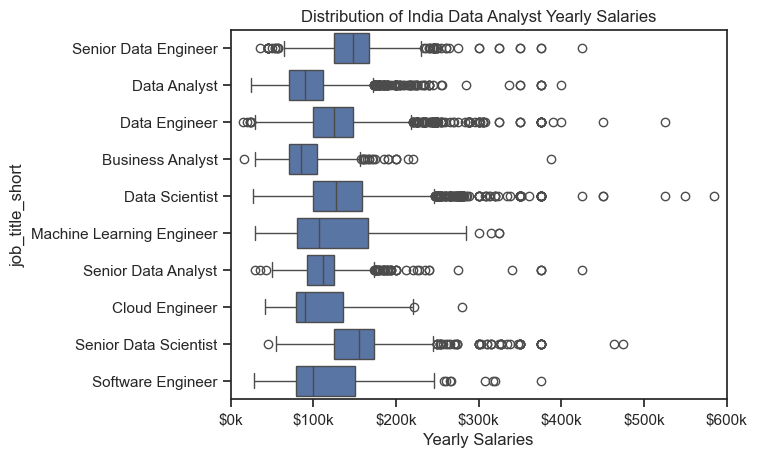

In [82]:
# sns.boxplot(data=df_IN,x='salary_year_avg', y='job_title_short')
sns.boxplot(data=df,x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f'${int(x/1000)}k'))
plt.xlim(0,600_000)
plt.title('Distribution of India Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
